## Final Project Submission

Please fill out:
* Student name: Isabella Lindgren
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Pablo Crespo
* Blog post URL:


In [836]:
# Import all necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression

In [837]:
# read in the data using pandas
kc = pd.read_csv("kc_house_data.csv")

# Get a brief overview of the data
print(kc.head(5))
print("---------------------------------------------------------------------------------")
print(kc.describe())
print("---------------------------------------------------------------------------------")



           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  

In [838]:
print(kc.info()) #check for missing data and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


Observations:

- Date and Sqft_basement are objects
- waterfront, view, yr_renovated missing data
- There are some outliers (a house has 33 bedrooms)
- Target variable: price

What are these variables actually explaining?

- id - Unique ID for each home sold 
- date - Date of the home sale 
- price - Price of each home sold 
- bedrooms - Number of bedrooms 
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 
- sqft_living - Square footage of the apartments interior living space 
- sqft_lot - Square footage of the land space 
- floors - Number of floors 
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 
- view - An index from 0 to 4 of how good the view of the property was 
- condition - An index from 1 to 5 on the condition of the apartment, 
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 
- sqft_above - The square footage of the interior housing space that is above ground level 
- sqft_basement - The square footage of the interior housing space that is below ground level 
- yr_built - The year the house was initially built 
- yr_renovated - The year of the house’s last renovation 
- zipcode - What zipcode area the house is in 
- lat - Lattitude 
- long - Longitude 
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

## What is my objective for this project?

- To create the best model for real estate developers to choose where to invest in King County, WA

## Let's start cleaning our data! 

In [839]:
# check for duplicated rows 'id' and see if there is any repetition
duplicates = kc[kc.duplicated(subset='id')]
print(len(duplicates))

177


In [840]:
# drop duplicates from the dataset
kc.drop_duplicates(subset='id', keep='first', inplace=True)

In [841]:
kc.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [842]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [843]:
# check for any missing data
kc.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [844]:
kc.isna().sum() # how many values are missing in each column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We can see that 'waterfront' and 'yr_renovated' are missing a large amount of data inputs. 

The variable "view" is only missing 63 values so we may be able to replace missing values with mean or median

mean      0.234677
median    0.000000
std       0.766459
Name: view, dtype: float64


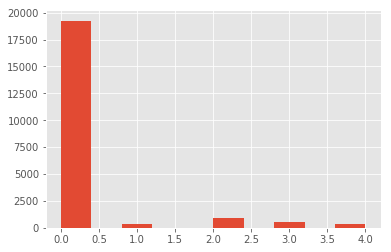

In [845]:
kc.view.hist(); # plot hist of values in 'view' column
print(kc.view.apply(['mean', 'median', 'std'])) # check mean, median and std with missing values

In [846]:
print('Percentage of Null View Values:', len(kc[kc.view.isna()])/ len(kc))
print('Number of Unique View Values:', kc.view.nunique())

# Very low percentage (0.2%) of null values in 'view' column
# categorical data

Percentage of Null View Values: 0.0029411764705882353
Number of Unique View Values: 5


In [847]:
# Using the median instead of the mean as a replacement makes more sense so we have less bias in our data
# The most common value is 0 and the median is 0

median_view = kc.view.median()
kc['view'].fillna(median_view, inplace=True)

kc_median_view = kc.view.fillna(value=median_view)
print(kc_median_view.apply(['mean', 'median', 'std']))

# the mean changed a little, standard deviation is a little bit lower, median is the same

print('---------------------------------------------')

kc.isna().sum()
print(kc.view.value_counts(normalize=True))

mean      0.233987
median    0.000000
std       0.765437
Name: view, dtype: float64
---------------------------------------------
0.0    0.901774
2.0    0.044631
3.0    0.023576
1.0    0.015359
4.0    0.014659
Name: view, dtype: float64


In [848]:
# check that there are no more missing values for 'view'
kc.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [849]:
# Next lets deal with the 'waterfront' column. This is a categorical variable with only 2 possible values
# that is missing 2353 values which is about 11% of the data is missing

print('Percentage of Null Waterfront Values:', len(kc[kc.waterfront.isna()])/ len(kc))
print('Number of Unique Waterfront Values:', kc.waterfront.nunique())

Percentage of Null Waterfront Values: 0.10985060690943044
Number of Unique Waterfront Values: 2


0.0    0.992343
1.0    0.007657
Name: waterfront, dtype: float64
---------------------------------------------------
mean      0.007657
median    0.000000
std       0.087172
Name: waterfront, dtype: float64


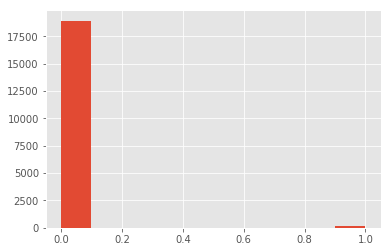

In [850]:
# Let's visualize the waterfront data with a histogram
kc.waterfront.hist();
print(kc.waterfront.value_counts(normalize=True))
# waterfront properties only account for .007% of the values in the kc dataset
print('---------------------------------------------------')

print(kc.waterfront.apply(['mean', 'median', 'std']))
# We can deal with 'waterfront' data similarly to the 'view' data since 0 is the most frequent value and the median

In [851]:
# replace missing values in 'waterfront' column with the median value since '0' is 99% of the total values
median_waterfront = kc.waterfront.median()
kc['waterfront'].fillna(median_waterfront, inplace=True)

kc_median_waterfront = kc.waterfront.fillna(value=median_waterfront)
print(kc_median_waterfront.apply(['mean', 'median', 'std']))

# mean is slightly lower, standard deviation is also slightly lower, not a big change so substitution was ok

kc.isna().sum()
print(kc.waterfront.value_counts(normalize=True))

mean      0.006816
median    0.000000
std       0.082280
Name: waterfront, dtype: float64
0.0    0.993184
1.0    0.006816
Name: waterfront, dtype: float64


In [852]:
#check that there are no more missing values for 'waterfront'
kc.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [853]:
# The last column we have to deal with is 'yr_renovated' which is a categorical variable

print('Percentage of Null yr_renovated Values:', len(kc[kc.yr_renovated.isna()])/ len(kc))
print('Number of Unique yr_renovated Values:', kc.yr_renovated.nunique())

# 17% of data is missing
print('---------------------------------------------------')

print(kc.yr_renovated.apply(['mean', 'median', 'std']))

Percentage of Null yr_renovated Values: 0.17759103641456583
Number of Unique yr_renovated Values: 70
---------------------------------------------------
mean       83.847241
median      0.000000
std       400.436625
Name: yr_renovated, dtype: float64


0.0       0.957993
2014.0    0.004144
2003.0    0.001760
2013.0    0.001760
2007.0    0.001703
2000.0    0.001646
2005.0    0.001646
2004.0    0.001249
2009.0    0.001192
1990.0    0.001192
1989.0    0.001135
2006.0    0.001135
2002.0    0.000965
1991.0    0.000908
1998.0    0.000908
1999.0    0.000851
2008.0    0.000851
2010.0    0.000851
2001.0    0.000851
1983.0    0.000851
1984.0    0.000851
2015.0    0.000795
1985.0    0.000795
1986.0    0.000795
1987.0    0.000795
1994.0    0.000795
1992.0    0.000738
1993.0    0.000681
1997.0    0.000681
1995.0    0.000681
            ...   
1975.0    0.000284
1964.0    0.000227
1981.0    0.000227
1965.0    0.000227
1973.0    0.000227
1963.0    0.000227
1969.0    0.000227
1978.0    0.000170
1960.0    0.000170
1958.0    0.000170
1956.0    0.000170
1955.0    0.000170
1972.0    0.000170
1945.0    0.000170
1967.0    0.000114
1940.0    0.000114
1974.0    0.000114
1962.0    0.000114
1957.0    0.000114
1951.0    0.000057
1946.0    0.000057
1959.0    0.

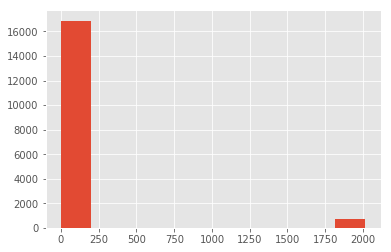

In [854]:
kc.yr_renovated.hist();
print(kc.yr_renovated.value_counts(normalize=True))

# The histogram shows that the missing values are being input as 'NaN' and no renovation is input as '0.0'
# 95% of the data is input as 0.0 which is a majority
print(kc.yr_renovated.apply(['mean', 'median', 'std']))


In [855]:
kc.yr_renovated.unique() # we need to replace nan with the most frequent value '0'

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [856]:
# replace the missing values in 'yr_renovated' with '0' since it is the most frequent value
kc['yr_renovated'] = kc['yr_renovated'].fillna(0)

print(kc.yr_renovated.unique())

[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [857]:
#check if yr_renovated is missing any values - should be False
kc.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

## Visualize and Play with the data before separating into categorical and continuous data

C:\Users\isali\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x1080 with 0 Axes>

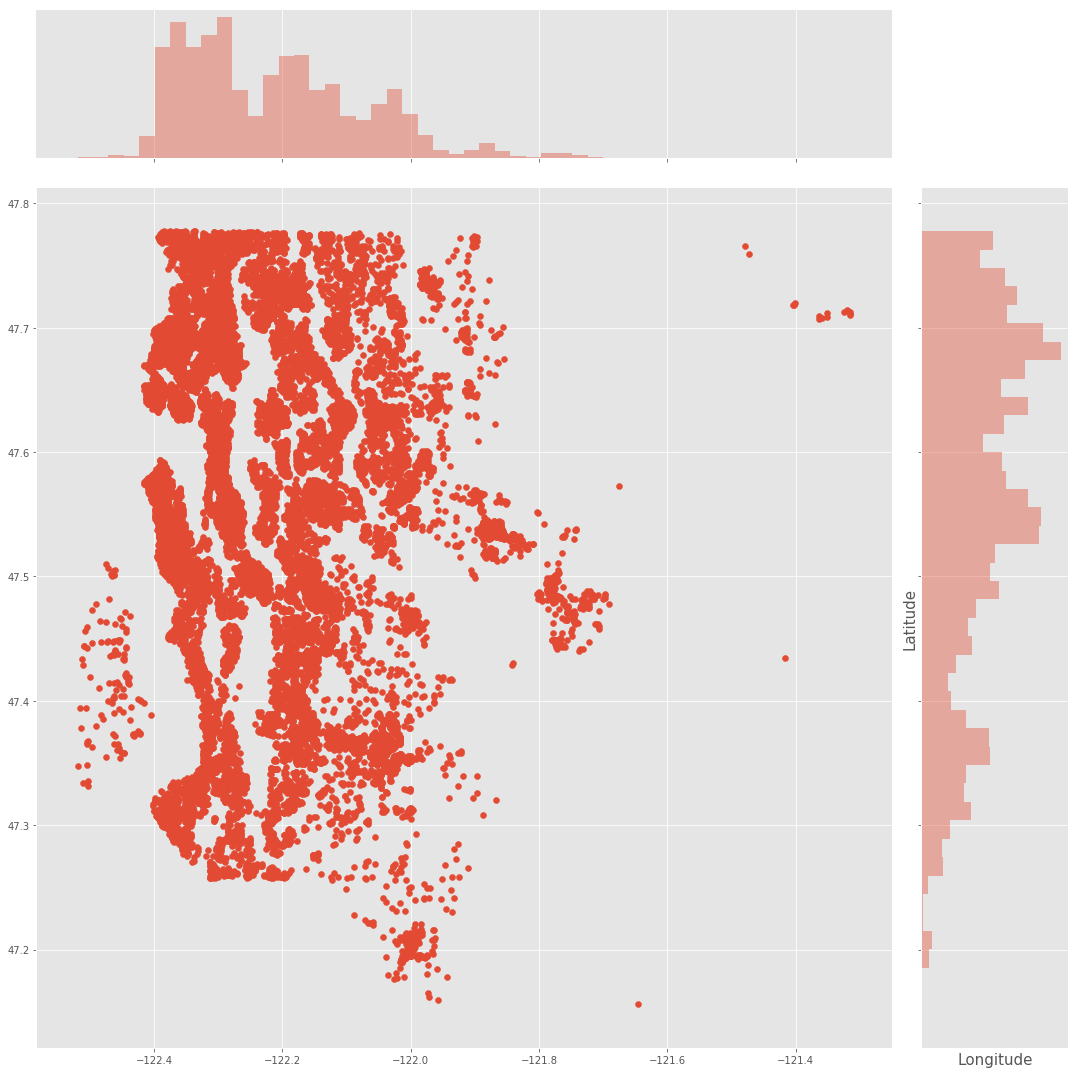

<function seaborn.distributions.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)>

In [858]:
# Visualize the density of houses in relation to latitude and longitude
# The highest density may mean that it is a favorable location for a house
plt.figure(figsize=(18,15))
sns.jointplot(x=kc.long.values, y=kc.lat.values, size=15)
plt.ylabel('Latitude', fontsize= 15)
plt.xlabel('Longitude', fontsize=15)

plt.show()
sns.distplot

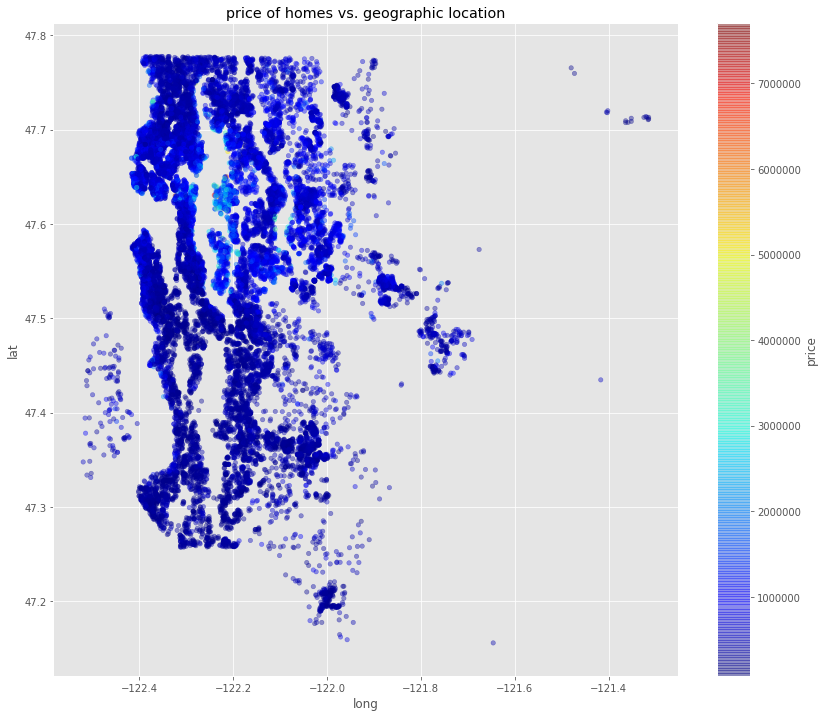

In [859]:
kc.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(14,12),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True, title='price of homes vs. geographic location',
    sharex=False);

#Higher house price at higher latitude since it is near Seattle city center

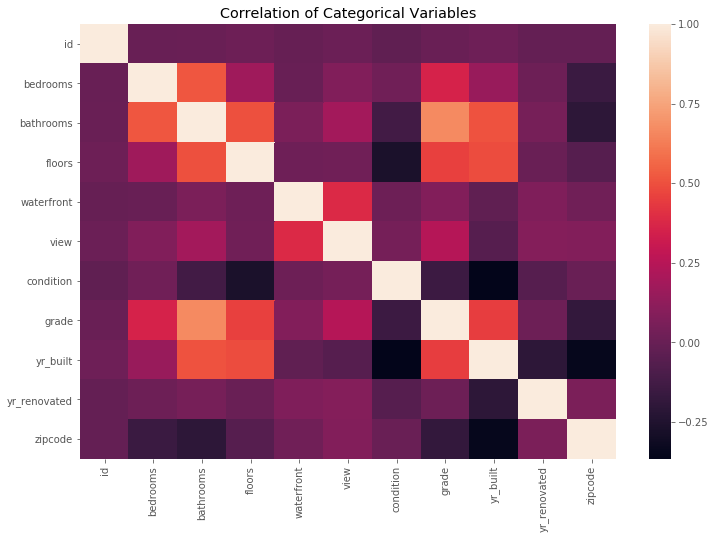

<Figure size 432x288 with 0 Axes>

In [860]:
# specify categorical and data to get an idea of which variables are correlated
#- Categorical data: bedrooms, bathrooms, floors, waterfront, view, condition, yr_built, yr_renovated, grade, zipcode
#- Continuous data: date, sqft_living, sqft_lot, sqft_above, sqft_basement, lat, long, sqft_living15, sqft_lot15

numcols = ['price','date','sqft_living','sqft_lot','sqft_above','sqft_basement', 'lat','long','sqft_living15','sqft_lot15']
catcols = [x for x in kc.columns if x not in numcols]

#Lets start by plotting a heatmap to determine if any variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=kc[catcols].corr())
plt.title('Correlation of Categorical Variables')
plt.show()
plt.gcf().clear()

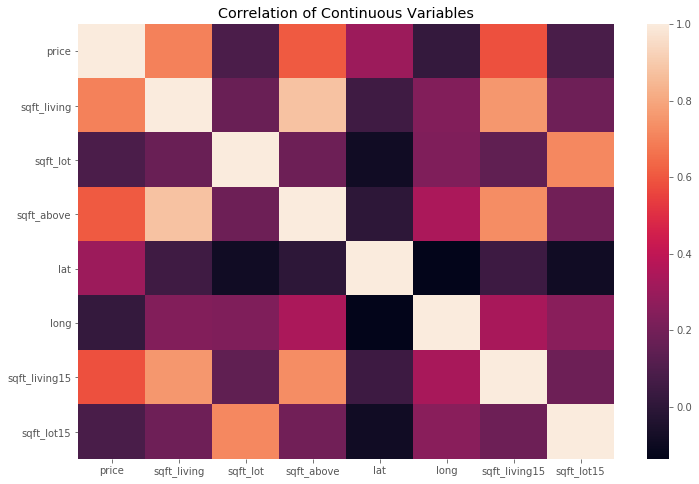

<Figure size 432x288 with 0 Axes>

In [861]:
plt.figure(figsize = (12,8))
sns.heatmap(data=kc[numcols].corr())
plt.title('Correlation of Continuous Variables')
plt.show()
plt.gcf().clear()


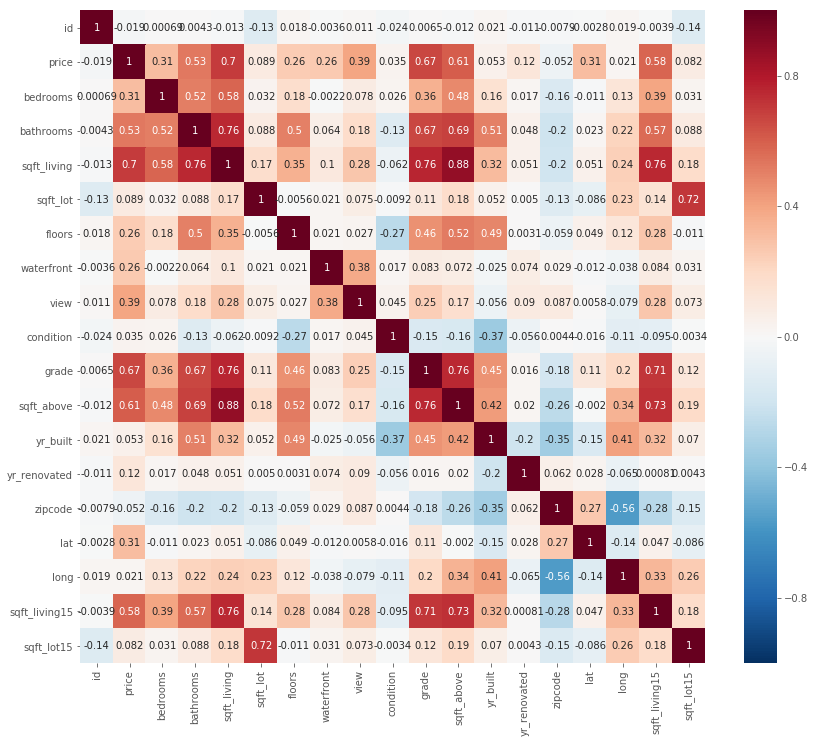

In [862]:
correlation = kc.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [863]:
# Since yr_renovated is a categorical variable, lets try putting the years in bins by decade 
# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
# use pd.cut
bins_yr_renovated = pd.cut(kc['yr_renovated'], bins)

In [864]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_yr_renovated = bins_yr_renovated.cat.as_unordered()
bins_yr_renovated.head()

0                 NaN
1    (1990.0, 2000.0]
2                 NaN
3                 NaN
4                 NaN
Name: yr_renovated, dtype: category
Categories (9, interval[int64]): [(0, 1940], (1940, 1950], (1950, 1960], (1960, 1970], ..., (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]]

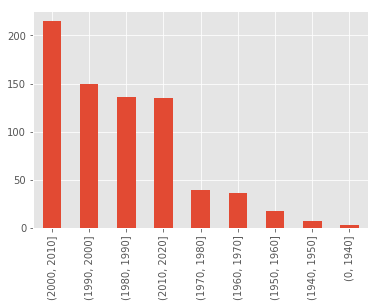

In [865]:
bins_yr_renovated.value_counts().plot(kind='bar');

In [866]:
# replace the existing "yr_renovated" column
kc["yr_renovated"]=bins_yr_renovated

In [867]:
# we can see that 'yr_renovated' is now listed as a dtype 'category'
kc.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     740 non-null category
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: category(1), float64(7), int64(11), object(2)
memory usage: 3.5+ MB


In [868]:
# Let's bin the 'yr_built' category as well for consistency purposes
# First check the unique values to get an idea of what bins should be. Let's try by decade
# print(kc.yr_built.value_counts())

bins = [0, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
# use pd.cut
bins_yr_built = pd.cut(kc['yr_built'], bins)

In [869]:
# using pd.cut returns unordered categories. Transform this to ordered categories.
bins_yr_built = bins_yr_built.cat.as_unordered()
bins_yr_built.head()

0    (1950, 1960]
1    (1950, 1960]
2    (1930, 1940]
3    (1960, 1970]
4    (1980, 1990]
Name: yr_built, dtype: category
Categories (13, interval[int64]): [(0, 1900], (1900, 1910], (1910, 1920], (1920, 1930], ..., (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]]

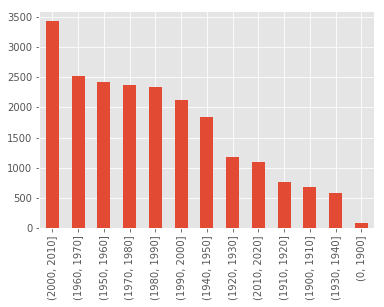

In [870]:
# Visualize the values in bins
bins_yr_built.value_counts().plot(kind='bar');

In [871]:
# replace the existing "yr_renovated" column
kc["yr_built"]=bins_yr_built

In [872]:
# we can see that 'yr_built' is now listed as a dtype 'category'
kc.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null category
yr_renovated     740 non-null category
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: category(2), float64(7), int64(10), object(2)
memory usage: 3.3+ 

In [873]:
for col in kc.columns:
    print(col, '\n', kc[col].value_counts(normalize=True).head(), '\n\n') #Check for extraneous values

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
Name: id, dtype: float64 


date 
 6/23/2014    0.006629
6/26/2014    0.006116
6/25/2014    0.006116
7/8/2014     0.005929
4/27/2015    0.005882
Name: date, dtype: float64 


price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
Name: price, dtype: float64 


bedrooms 
 3    0.454295
4    0.319748
2    0.127731
5    0.074043
6    0.012372
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249860
1.00    0.177124
1.75    0.140990
2.25    0.094818
2.00    0.089309
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006349
1440    0.006209
1400    0.006162
1660    0.005976
1800    0.005976
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016573
6000    0.013352
4000    0.011625
7200    0.010177
7500    0.005509
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.492624
2.0    0.382960
1.5    

In [874]:
kc.sqft_basement.value_counts(normalize=True)  # We can see '?' appears 2% of the values
len(kc[(kc.sqft_basement=='?') ])   # The number of times '?' appears as a value

452

In [875]:
kc.sqft_basement.value_counts(normalize=True)

#Method: randomly select a class acccording to current distribution
rel_prob = [.61, .01, .0099, .0099, .0093]
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_sqft_basement(value):
    if value == '?':
        return np.random.choice(['0.0','600.0','700.0', '500.0', '800.0'], p=prob)
    else:
        return value
kc.sqft_basement = kc.sqft_basement.map(lambda x: impute_sqft_basement(x))
kc.sqft_basement.value_counts(normalize=True)  # no longer has '?'

0.0       0.613819
600.0     0.010317
500.0     0.009944
700.0     0.009851
800.0     0.009524
400.0     0.008590
1000.0    0.006816
900.0     0.006583
300.0     0.006583
480.0     0.004809
200.0     0.004809
450.0     0.004715
750.0     0.004715
530.0     0.004715
720.0     0.004575
620.0     0.004155
580.0     0.003922
840.0     0.003828
420.0     0.003782
860.0     0.003688
1100.0    0.003641
670.0     0.003595
550.0     0.003548
780.0     0.003501
240.0     0.003455
650.0     0.003455
380.0     0.003408
680.0     0.003361
940.0     0.003315
360.0     0.003315
            ...   
2330.0    0.000047
65.0      0.000047
2500.0    0.000047
875.0     0.000047
862.0     0.000047
906.0     0.000047
2730.0    0.000047
1913.0    0.000047
2120.0    0.000047
2390.0    0.000047
2850.0    0.000047
508.0     0.000047
2350.0    0.000047
1248.0    0.000047
176.0     0.000047
2310.0    0.000047
2360.0    0.000047
1930.0    0.000047
3000.0    0.000047
1024.0    0.000047
172.0     0.000047
2720.0    0.

In [876]:
len(kc[(kc.sqft_basement=='?') ])   # The number of times '?' appears is now '0'

0

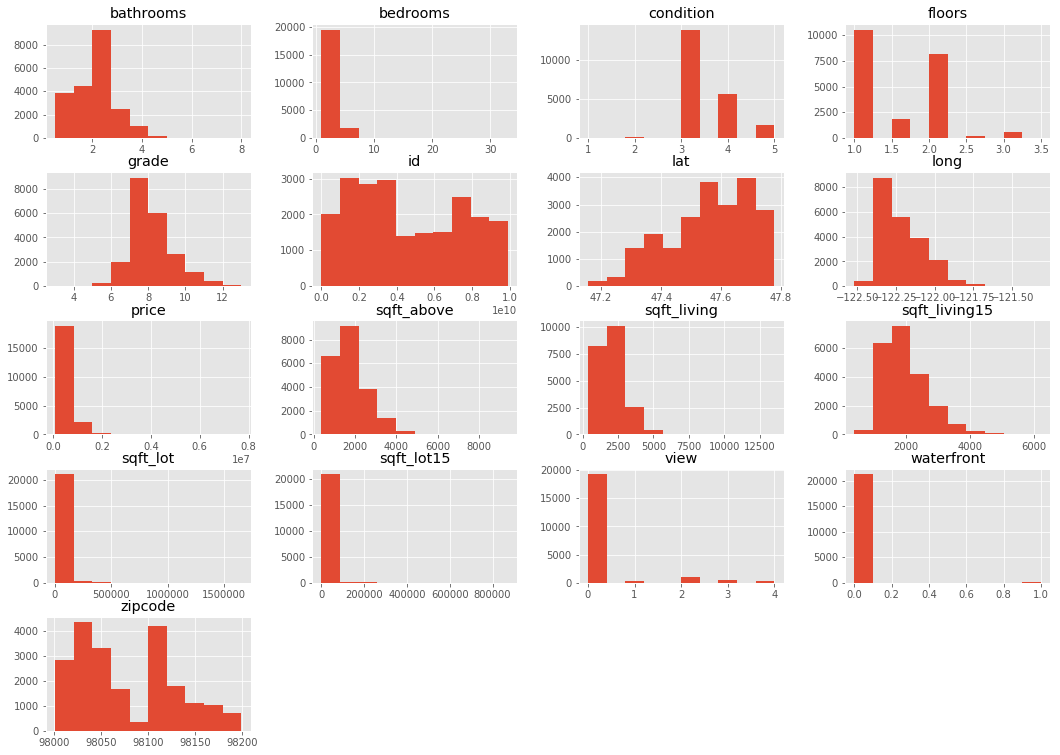

In [877]:
#Let's visualize the distributions to see which variables are categorical and continuous
kc.hist(figsize=(18,13) );

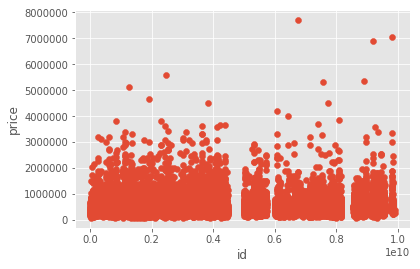

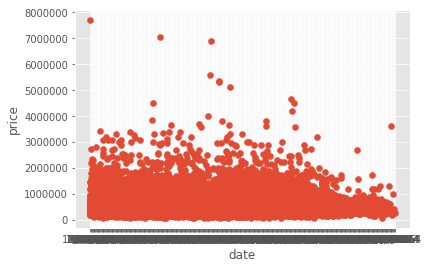

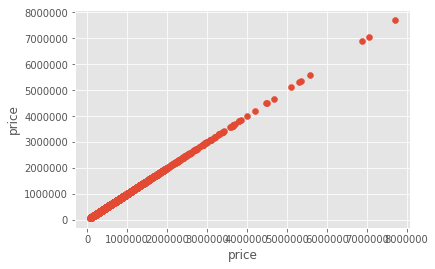

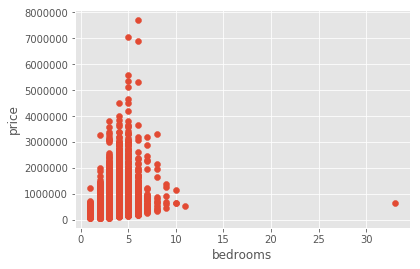

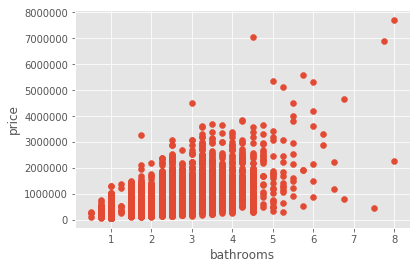

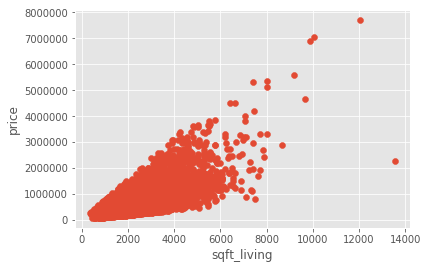

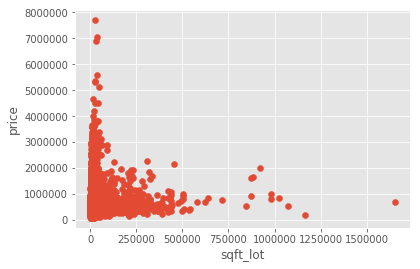

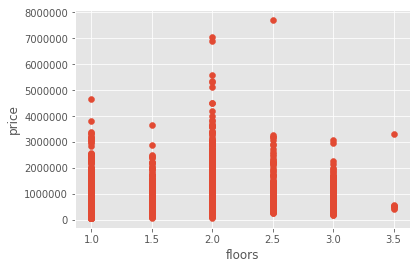

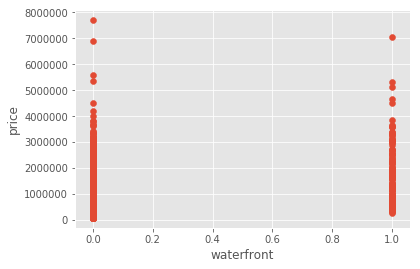

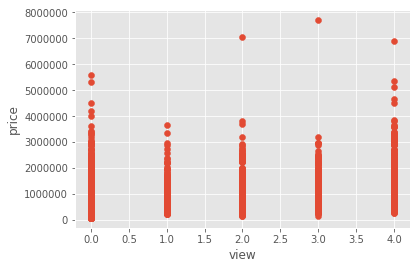

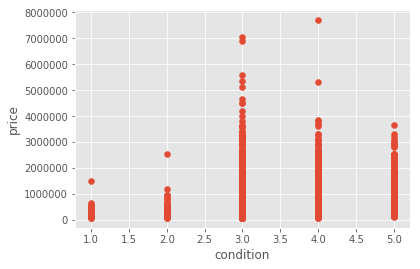

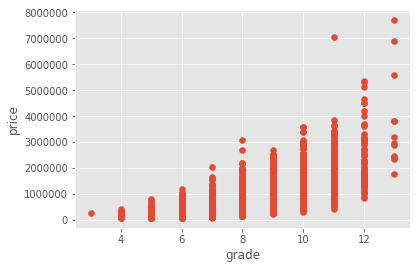

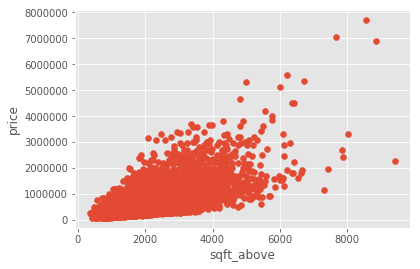

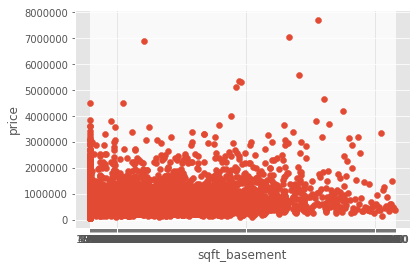

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

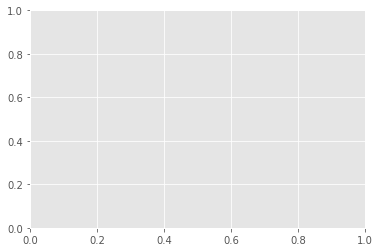

In [878]:
for i in kc:
    plt.scatter(kc[i], kc['price'])
    plt.xlabel(i)
    plt.ylabel('price')
    plt.show()

Observations:

- many of the variables have skewed distributions - transforming the data may be useful
- Categorical data: bedrooms, bathrooms, floors, waterfront, view, condition, yr_built, yr_renovated, grade, zipcode
- Continuous data: date, sqft_living, sqft_lot, sqft_above, lat, long, sqft_living15, sqft_lot15

## Let's start using linear regressions

In [879]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~bedrooms
-------------------------------------------------------------------------------------


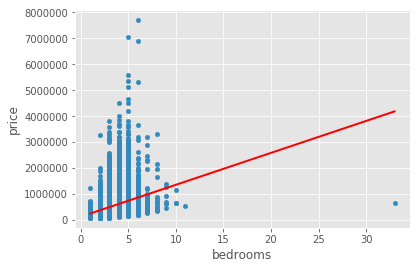

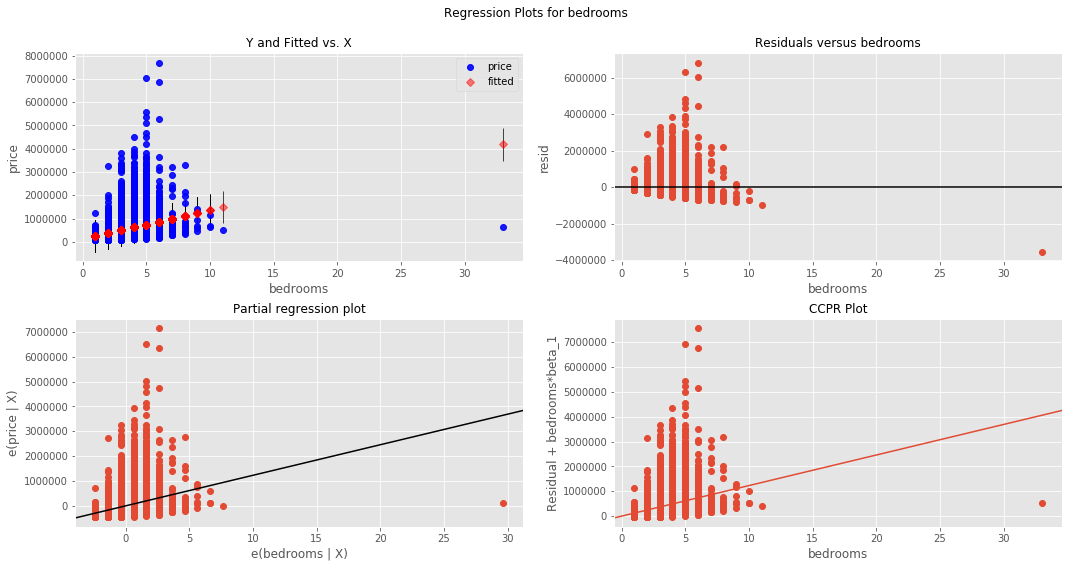

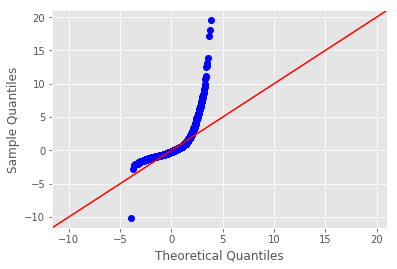

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~bathrooms
-------------------------------------------------------------------------------------


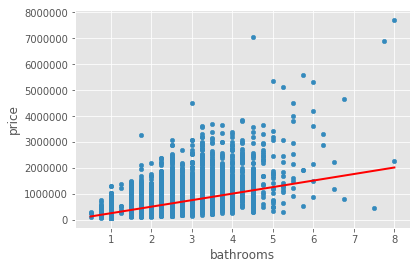

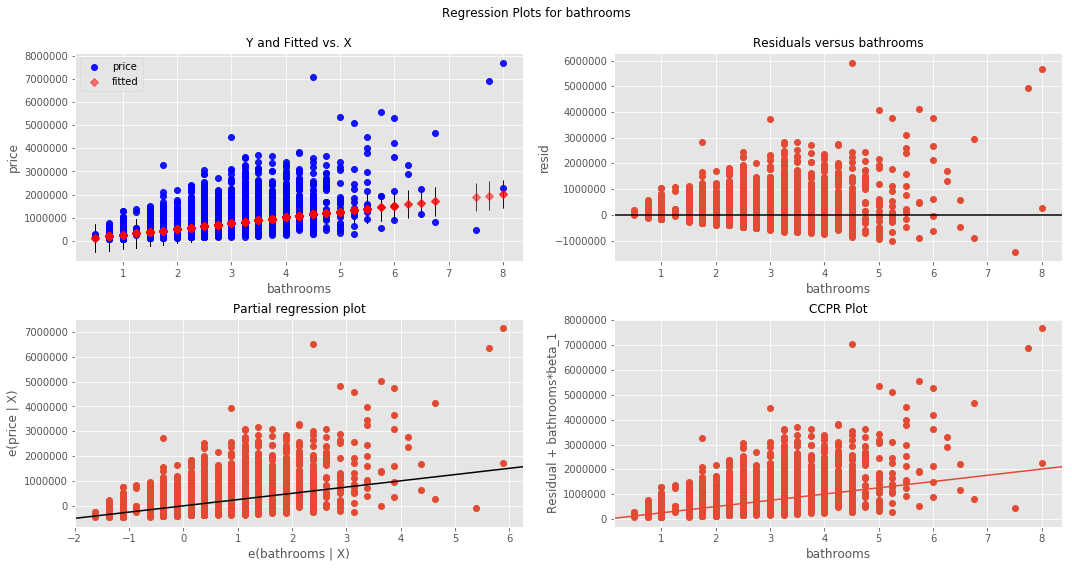

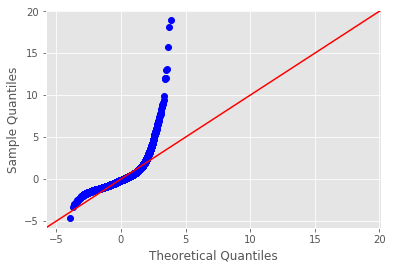

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_living
-------------------------------------------------------------------------------------


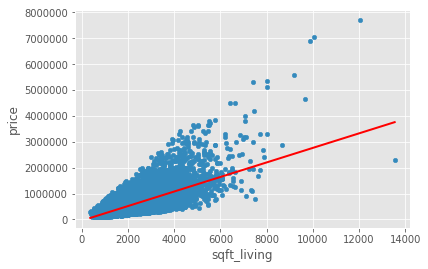

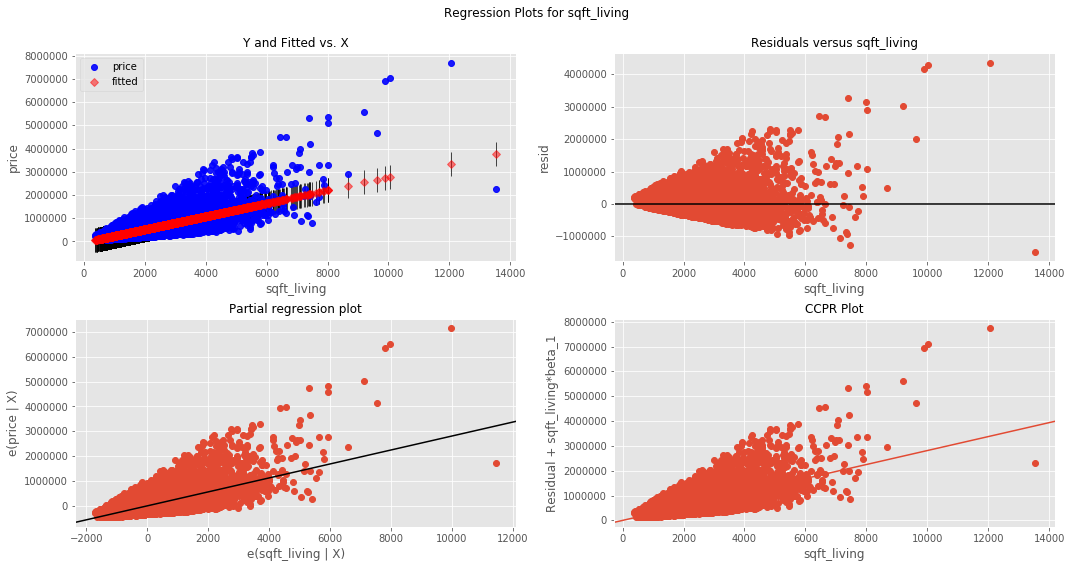

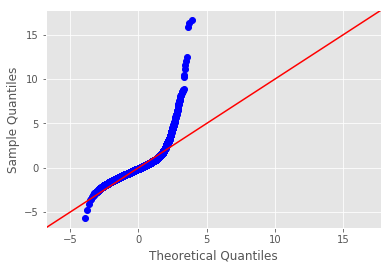

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_lot
-------------------------------------------------------------------------------------


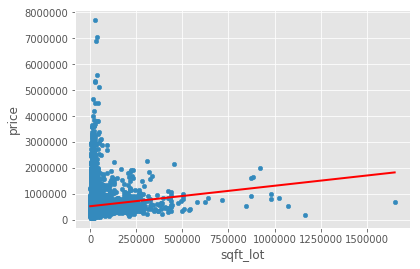

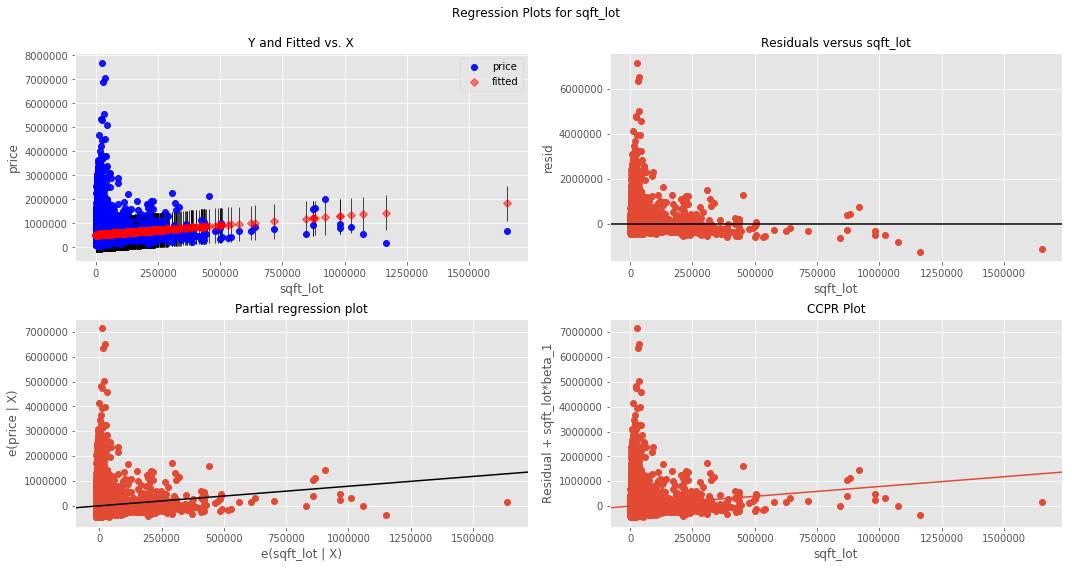

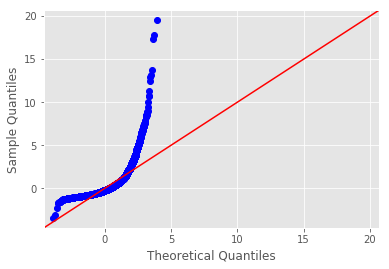

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~floors
-------------------------------------------------------------------------------------


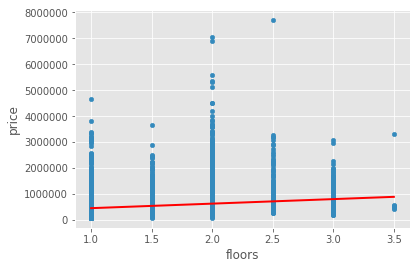

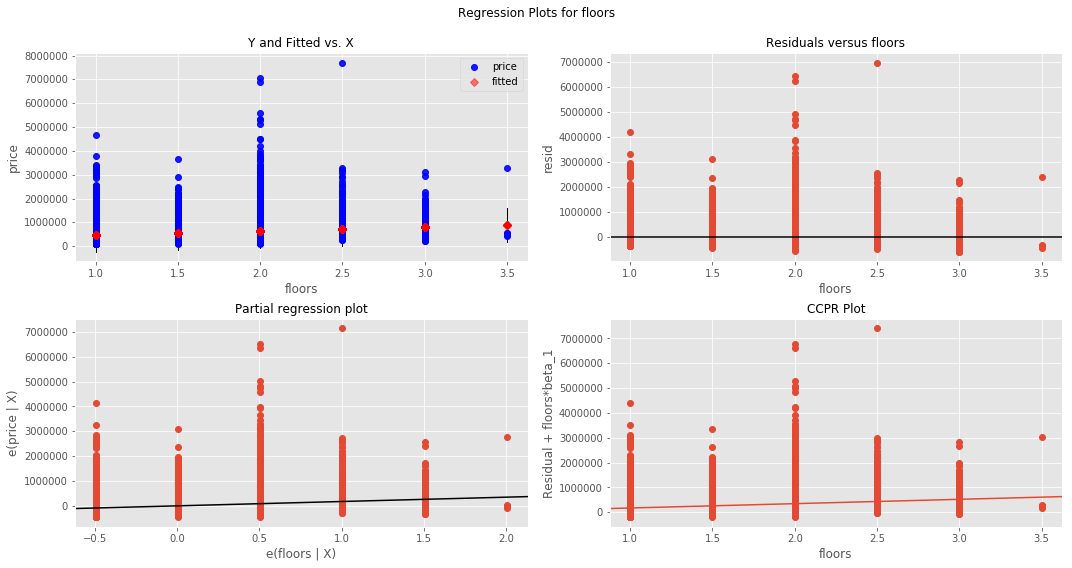

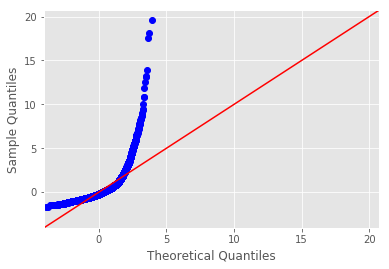

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~waterfront
-------------------------------------------------------------------------------------


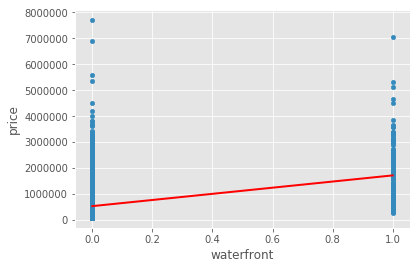

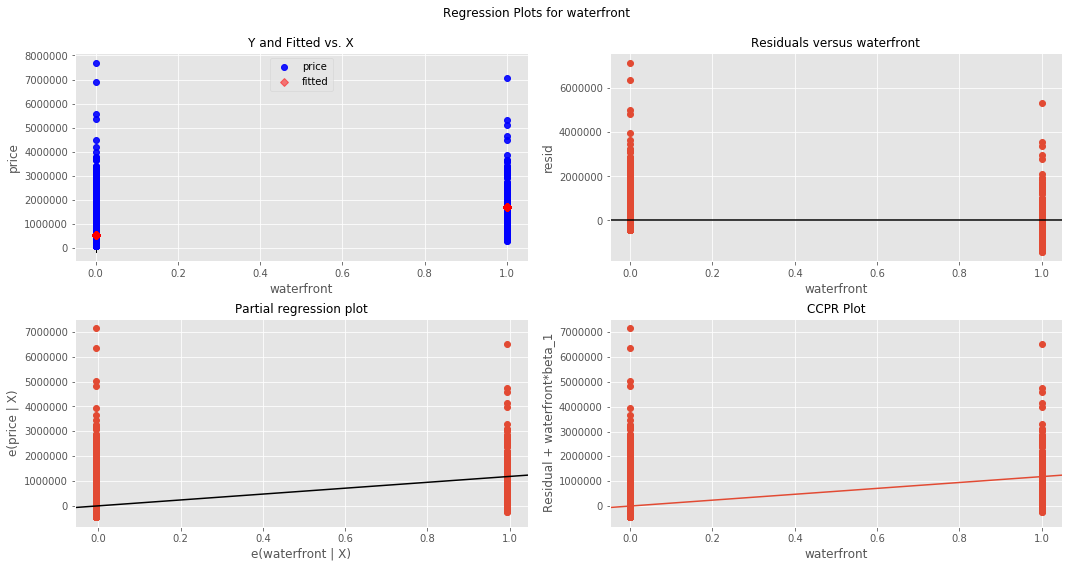

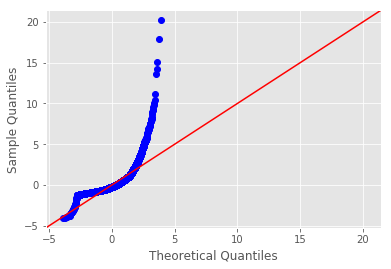

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~view
-------------------------------------------------------------------------------------


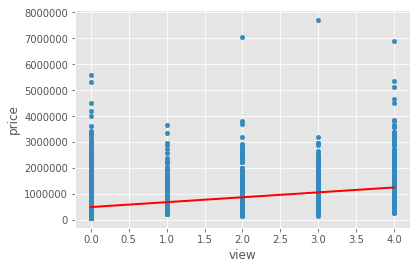

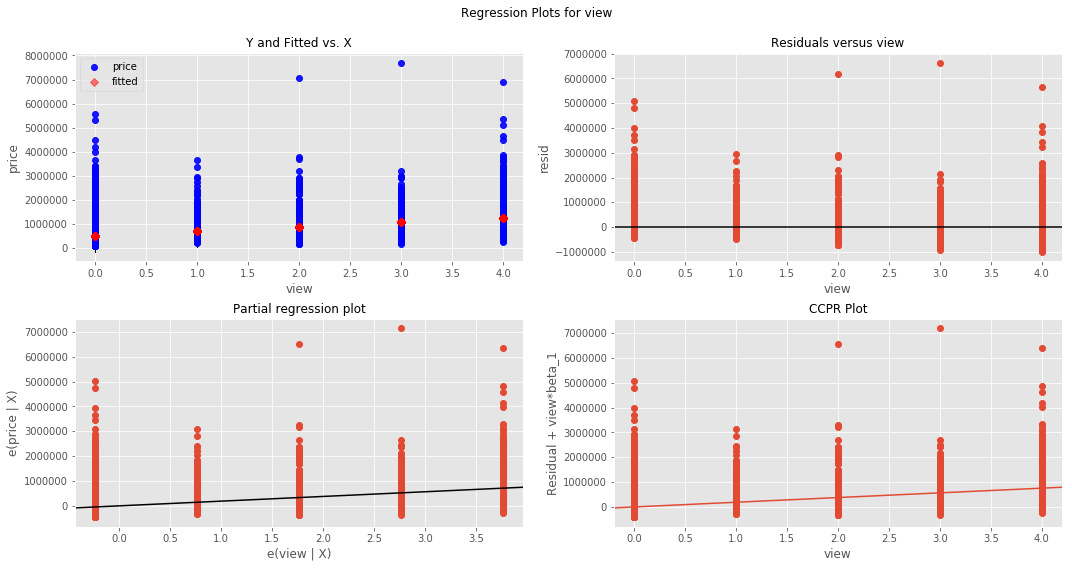

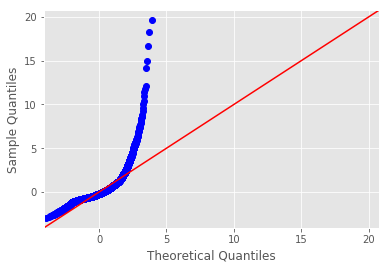

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~condition
-------------------------------------------------------------------------------------


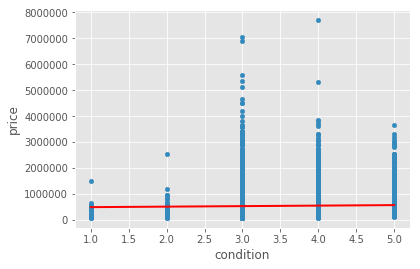

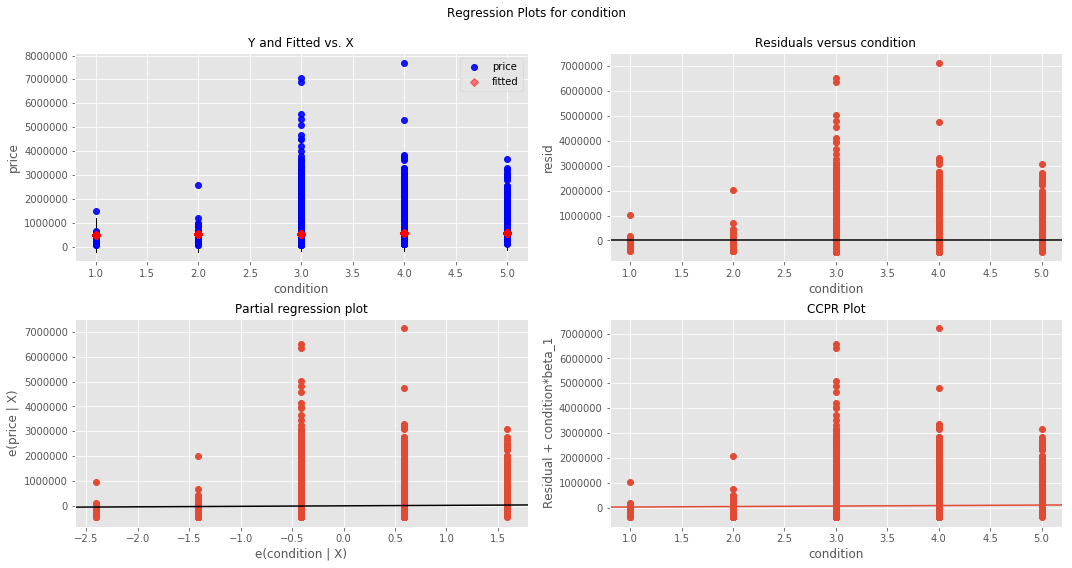

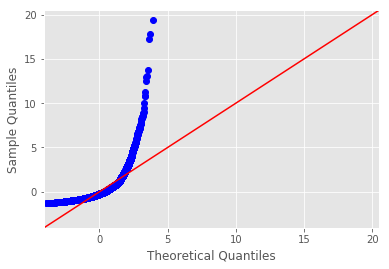

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~grade
-------------------------------------------------------------------------------------


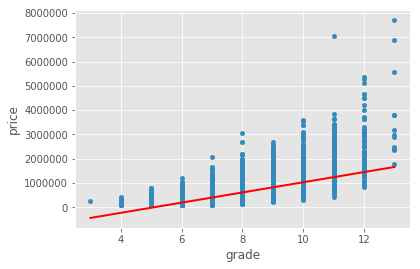

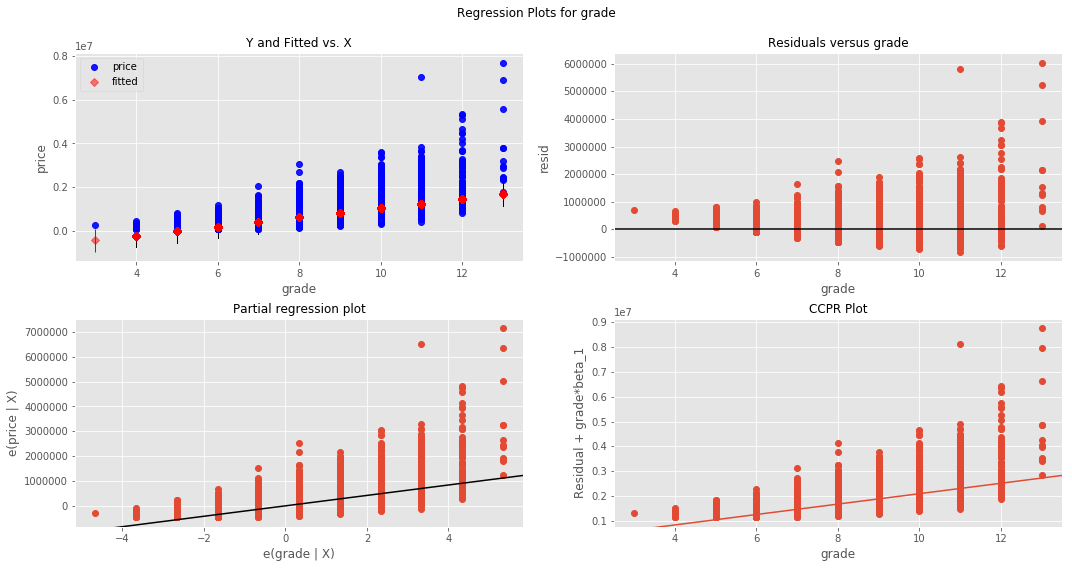

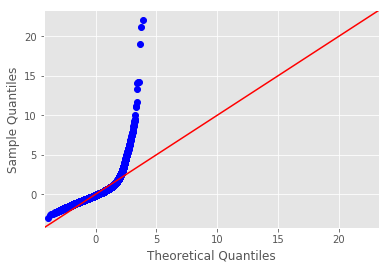

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~sqft_above
-------------------------------------------------------------------------------------


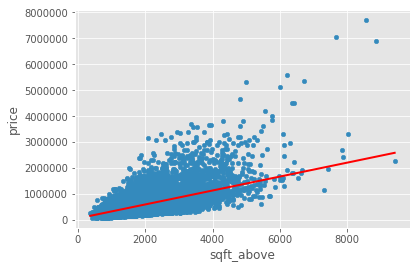

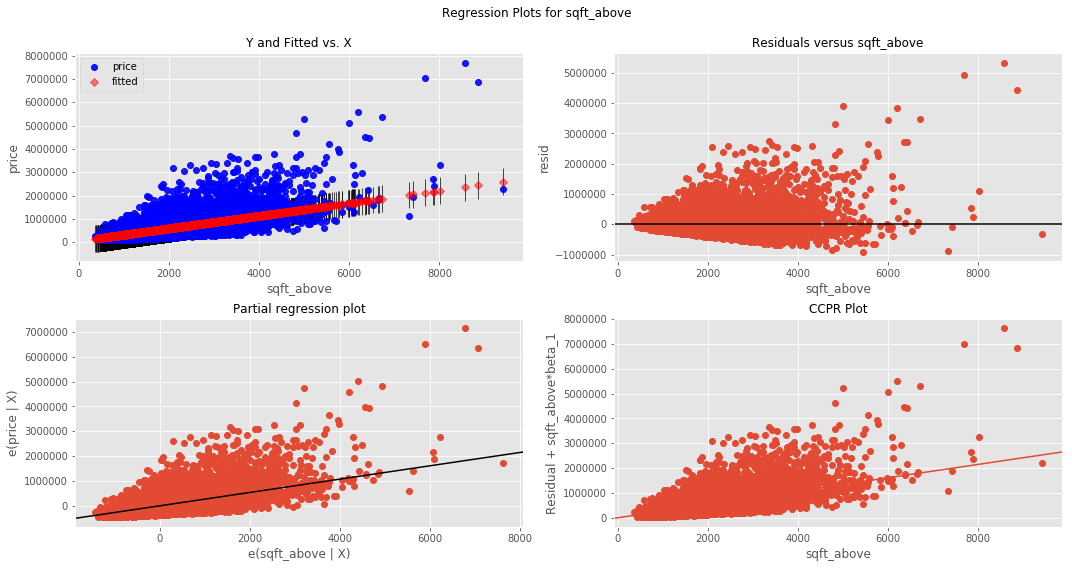

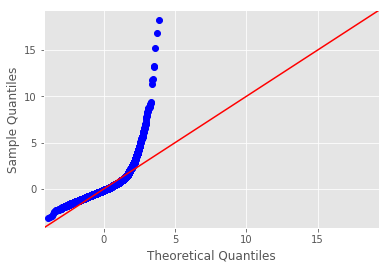

Press Enter to continue...
King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~yr_built
-------------------------------------------------------------------------------------


TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


In [880]:
# We have a lot of variables in this dataset so lets pick a few chosen independent variables

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                           'waterfront','view', 'condition', 'grade', 'sqft_above', 
                           'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']):
    print ("King County Housing DataSet - Regression Analysis and Diagnostics for formula: price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
#   
    model = smf.ols(formula=f, data=kc).fit()
    
    X_new = pd.DataFrame({val: [kc[val].min(), kc[val].max()]});
    preds = model.predict(X_new)
    kc.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")


In [881]:
pd.DataFrame(results)
# sqft_living and grade have the highest r_squared values but they still aren't good. Definitely needs preprocessing

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,bedrooms,0.0957611,125625,123035,0,1.18858e+06
2,bathrooms,0.276917,7174.8,251868,0,876438
3,sqft_living,0.492629,-44749.2,281.062,0,538458
4,sqft_lot,0.00794077,528796,0.789455,5.07357e-39,1.14026e+06
5,floors,0.0656823,279548,174595,0,1.24767e+06
6,waterfront,0.0701708,532665,1.18455e+06,0,905096
7,view,0.154538,496525,188962,0,1.06999e+06
8,condition,0.00120956,473597,19685.3,3.55616e-07,1.12939e+06
9,grade,0.446251,-1.0663e+06,209720,0,2.02868e+06


Some observations:

- Number of bedrooms has a positive relationship with price. Has a low r-squared so not a good fit. Skewed but normal distribution, qqplot has long tail which hurts normality. 

- Number of bathrooms has a positive relationship with price. Data looks categorical. Residual plots show heteroscadasticity - cone shaped residuals. Not normally distributed

- sqft_living

- sqft_lot

- floors

- waterfront

- condition

- grade has a positive relationship with price. Rsquared is higher for this mode, explains more of the variance than other variables. 

- sqft_above

- yr_built

- yr_renovated

- zipcode 

- sqft_living15

- sqft_lot15

## Let's deal with the Categorical Data

In [882]:
# kc.info()
# Now let's change categorical data to dtype 'category'
# and then create dummy variables for each categorical variable
kc['bathrooms'] = kc['bathrooms'].astype('category')
kc['bedrooms'] = kc['bedrooms'].astype('category')
kc['waterfront'] = kc['waterfront'].astype('category')
kc['condition'] = kc['condition'].astype('category')
kc['floors'] = kc['floors'].astype('category')
kc['grade'] = kc['grade'].astype('category')
kc['view'] = kc['view'].astype('category')
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null category
bathrooms        21420 non-null category
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null category
waterfront       21420 non-null category
view             21420 non-null category
condition        21420 non-null category
grade            21420 non-null category
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null category
yr_renovated     740 non-null category
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: category(9), float64(3), int64(7), object(2)
memory 

In [883]:
# Make dummy variables for categorical data
#Create dummy variables
bed_dummy = pd.get_dummies(kc.bedrooms, prefix="bedrooms")
kc = kc.drop(["bedrooms"], axis=1)
kc = pd.concat([kc, bed_dummy], axis=1)
kc.head()

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33
0,7129300520,10/13/2014,221900.0,1.00,1180,5650,1.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2.25,2570,7242,2.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,3.00,1960,5000,1.0,0.0,0.0,5,...,0,1,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,2.00,1680,8080,1.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0


In [884]:
# Make dummy variables for categorical data
#Create dummy variables
bath_dummy = pd.get_dummies(kc.bathrooms, prefix="bathrooms")
kc = kc.drop(["bathrooms"], axis=1)
kc = pd.concat([kc, bath_dummy], axis=1)
kc.head()

,id,date,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0
0,7129300520,10/13/2014,221900.0,1180,5650,1.0,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,2.0,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,770,10000,1.0,0.0,0.0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,1.0,0.0,0.0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,1.0,0.0,0.0,3,8,...,0,0,0,0,0,0,0,0,0,0


In [885]:
floors_dummy = pd.get_dummies(kc.floors, prefix="floors")
kc = kc.drop(["floors"], axis=1)
kc = pd.concat([kc, floors_dummy], axis=1)
kc.head()

,id,date,price,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,...,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,7129300520,10/13/2014,221900.0,1180,5650,0.0,0.0,3,7,1180,...,0,0,0,0,1,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,0.0,0.0,3,7,2170,...,0,0,0,0,0,0,1,0,0,0
2,5631500400,2/25/2015,180000.0,770,10000,0.0,0.0,3,6,770,...,0,0,0,0,1,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,0.0,0.0,5,7,1050,...,0,0,0,0,1,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,0.0,0.0,3,8,1680,...,0,0,0,0,1,0,0,0,0,0


In [886]:
view_dummy = pd.get_dummies(kc.view, prefix="view")
kc = kc.drop(["view"], axis=1)
kc = pd.concat([kc, view_dummy], axis=1)
kc.head()

,id,date,price,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,sqft_basement,...,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0
0,7129300520,10/13/2014,221900.0,1180,5650,0.0,3,7,1180,0.0,...,0,0,0,0,0,1,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,0.0,3,7,2170,400.0,...,0,1,0,0,0,1,0,0,0,0
2,5631500400,2/25/2015,180000.0,770,10000,0.0,3,6,770,0.0,...,0,0,0,0,0,1,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,0.0,5,7,1050,910.0,...,0,0,0,0,0,1,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,0.0,3,8,1680,0.0,...,0,0,0,0,0,1,0,0,0,0


In [887]:
condition_dummy = pd.get_dummies(kc.condition, prefix="condition")
kc = kc.drop(["condition"], axis=1)
kc = pd.concat([kc, condition_dummy], axis=1)
kc.head()

,id,date,price,sqft_living,sqft_lot,waterfront,grade,sqft_above,sqft_basement,yr_built,...,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_1,condition_2,condition_3,condition_4,condition_5
0,7129300520,10/13/2014,221900.0,1180,5650,0.0,7,1180,0.0,"(1950, 1960]",...,1,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,0.0,7,2170,400.0,"(1950, 1960]",...,1,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,770,10000,0.0,6,770,0.0,"(1930, 1940]",...,1,0,0,0,0,0,0,1,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,0.0,7,1050,910.0,"(1960, 1970]",...,1,0,0,0,0,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,1680,8080,0.0,8,1680,0.0,"(1980, 1990]",...,1,0,0,0,0,0,0,1,0,0


In [888]:
grade_dummy = pd.get_dummies(kc.grade, prefix="grade")
kc = kc.drop(["grade"], axis=1)
kc = pd.concat([kc, grade_dummy], axis=1)
kc.head()

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,10/13/2014,221900.0,1180,5650,0.0,1180,0.0,"(1950, 1960]",NaN,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,0.0,2170,400.0,"(1950, 1960]","(1990.0, 2000.0]",...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,770,10000,0.0,770,0.0,"(1930, 1940]",NaN,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,0.0,1050,910.0,"(1960, 1970]",NaN,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,0.0,1680,0.0,"(1980, 1990]",NaN,...,0,0,0,0,1,0,0,0,0,0


In [889]:
yr_built_dummy = pd.get_dummies(kc.yr_built, prefix="yr_built")
kc = kc.drop(["yr_built"], axis=1)
kc = pd.concat([kc, yr_built_dummy], axis=1)
kc.head()

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_renovated,zipcode,...,"yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2010]","yr_built_(2010, 2020]"
0,7129300520,10/13/2014,221900.0,1180,5650,0.0,1180,0.0,NaN,98178,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,0.0,2170,400.0,"(1990.0, 2000.0]",98125,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,770,10000,0.0,770,0.0,NaN,98028,...,0,1,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,0.0,1050,910.0,NaN,98136,...,0,0,0,0,1,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,0.0,1680,0.0,NaN,98074,...,0,0,0,0,0,0,1,0,0,0


In [890]:
yr_renovated_dummy = pd.get_dummies(kc.yr_renovated, prefix="yr_renovated")
kc = kc.drop(["yr_renovated"], axis=1)
kc = pd.concat([kc, yr_renovated_dummy], axis=1)
kc.head()

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,zipcode,lat,...,"yr_built_(2010, 2020]","yr_renovated_(0, 1940]","yr_renovated_(1940, 1950]","yr_renovated_(1950, 1960]","yr_renovated_(1960, 1970]","yr_renovated_(1970, 1980]","yr_renovated_(1980, 1990]","yr_renovated_(1990, 2000]","yr_renovated_(2000, 2010]","yr_renovated_(2010, 2020]"
0,7129300520,10/13/2014,221900.0,1180,5650,0.0,1180,0.0,98178,47.5112,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,0.0,2170,400.0,98125,47.7210,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,770,10000,0.0,770,0.0,98028,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,0.0,1050,910.0,98136,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,0.0,1680,0.0,98074,47.6168,...,0,0,0,0,0,0,0,0,0,0


In [891]:
#zipcode_dummy = pd.get_dummies(kc.zipcode, prefix="zipcode")
kc = kc.drop(["zipcode"], axis=1)
#kc = pd.concat([kc, zipcode_dummy], axis=1)
#kc.head()

In [892]:
# let's change 'sqft_basement' to int 
kc['sqft_basement'] = pd.to_numeric(kc['sqft_basement'])
kc['sqft_basement'].head(5)

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64

In [813]:
# let's change 'date' to datetime
#kc['date'] = pd.to_datetime(kc['date'])
#kc['date'].head(5)

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [893]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [894]:
kc.describe()

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,"yr_built_(2010, 2020]","yr_renovated_(0, 1940]","yr_renovated_(1940, 1950]","yr_renovated_(1950, 1960]","yr_renovated_(1960, 1970]","yr_renovated_(1970, 1980]","yr_renovated_(1980, 1990]","yr_renovated_(1990, 2000]","yr_renovated_(2000, 2010]","yr_renovated_(2010, 2020]"
count,2.142000e+04,2.142000e+04,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,2083.132633,1.512804e+04,1791.170215,286.515920,47.560197,-122.213784,1988.384080,12775.718161,...,0.051120,0.000140,0.000327,0.000840,0.001681,0.001867,0.006349,0.007003,0.010037,0.006303
std,2.876761e+09,3.679311e+05,918.808412,4.153080e+04,828.692965,440.056546,0.138589,0.140791,685.537057,27345.621867,...,0.220249,0.011834,0.018075,0.028977,0.040962,0.043174,0.079430,0.083391,0.099685,0.079140
min,1.000102e+06,7.800000e+04,370.000000,5.200000e+02,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123537e+09,3.225000e+05,1430.000000,5.040000e+03,1200.000000,0.000000,47.471200,-122.328000,1490.000000,5100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904921e+09,4.500000e+05,1920.000000,7.614000e+03,1560.000000,0.000000,47.572100,-122.230000,1840.000000,7620.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.308900e+09,6.450000e+05,2550.000000,1.069050e+04,2220.000000,550.000000,47.678100,-122.125000,2370.000000,10086.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Check Correlation and Collinearity


In [895]:
# slice only the continuous data
kc_cont = kc.iloc[:,1:10]

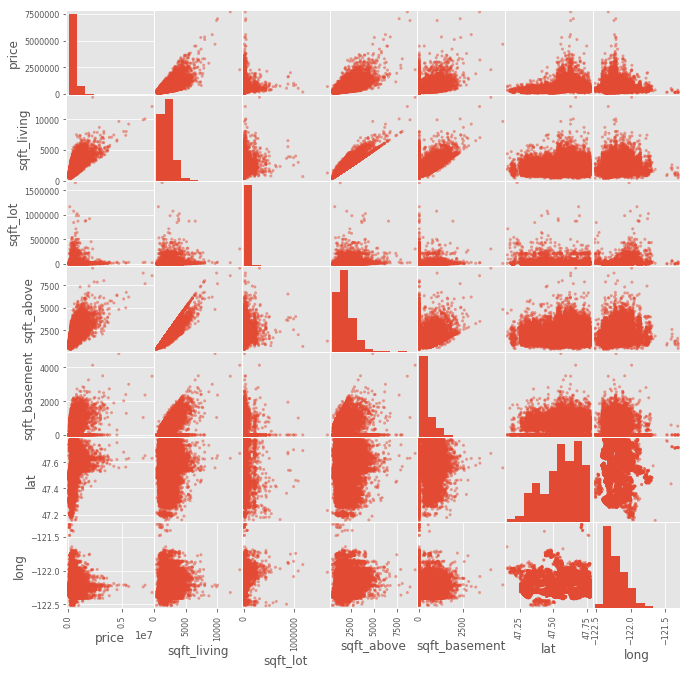

In [896]:
# create a scatter matrix to visualize distributions of all continuous data variables
pd.plotting.scatter_matrix(kc_cont,figsize  = [11, 11]);

In [897]:
# check correlation of continuous variables
kc_cont.corr() 

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long
price,1.000000,0.701875,0.089111,0.605294,0.320630,0.305744,0.020983
sqft_living,0.701875,1.000000,0.172586,0.876533,0.427603,0.050739,0.240212
sqft_lot,0.089111,0.172586,1.000000,0.183210,0.014679,-0.085822,0.230265
sqft_above,0.605294,0.876533,0.183210,1.000000,-0.052101,-0.002040,0.344161
sqft_basement,0.320630,0.427603,0.014679,-0.052101,1.000000,0.108610,-0.143585
lat,0.305744,0.050739,-0.085822,-0.002040,0.108610,1.000000,-0.136228
long,0.020983,0.240212,0.230265,0.344161,-0.143585,-0.136228,1.000000


# Observations

- There is a high correlation between sqft_living and price and sqft_above and price
- Sqft_basement and Latitude both are also positively correlated with price
- Latitude seems to have a higher correlation with price than longitude
- longitude, sqft_lot have low correlation

In [898]:
abs(kc_cont.corr())>0.75

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long
price,True,False,False,False,False,False,False
sqft_living,False,True,False,True,False,False,False
sqft_lot,False,False,True,False,False,False,False
sqft_above,False,True,False,True,False,False,False
sqft_basement,False,False,False,False,True,False,False
lat,False,False,False,False,False,True,False
long,False,False,False,False,False,False,True


In [899]:
# sqft_above is most problematic since it is highly correlated with sqft_living so remove this from dataset
kc = kc.drop("sqft_above",axis=1)

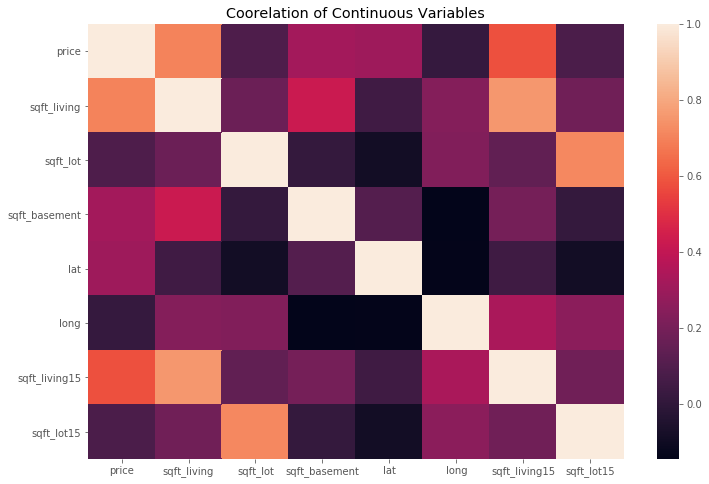

<Figure size 432x288 with 0 Axes>

In [900]:
#kc.head()
# specify categorical and data and see which variables are correlated
#- Categorical data: bedrooms, bathrooms, floors, waterfront, view, condition, yr_built, yr_renovated, grade, zipcode
#- Continuous data: date, sqft_living, sqft_lot, sqft_above, sqft_basement, lat, long, sqft_living15, sqft_lot15

numcols = ['price','date','sqft_living','sqft_lot','sqft_basement', 'lat','long','sqft_living15','sqft_lot15']
catcols = [x for x in kc.columns if x not in numcols]

#Lets start by plotting a heatmap to determine if any variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=kc[numcols].corr())
plt.title('Coorelation of Continuous Variables')
plt.show()
plt.gcf().clear()

## Transformations, Normalizations, Standardizations


In [901]:
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = ['sqft_living', 'sqft_lot', 'sqft_basement',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=kc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     4423.
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:44:37   Log-Likelihood:            -2.9533e+05
No. Observations:               21420   AIC:                         5.907e+05
Df Residuals:                   21412   BIC:                         5.907e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.014e+07   1.61e+06    -49.865      0.000   -8.33e+07    -7.7e+07
sqft_living     242.0297      2.994     80.836      0.000     236.161     247.898
sqft_lot          0.2997      0.056      5.361      0.000       0.190       0.409
sqft_basement   -17.1280      4.272     -4.009      0.000     -25.501      -8.755
lat            6.622e+05   1.18e+04     55.992      0.000    6.39e+05    6.85e+05
long          -3.968e+05   1.29e+04    -30.795      0.000   -4.22e+05   -3.72e+05
sqft_living15    91.2149      3.751     24.314      0.000      83.862      98.568
sqft_lot15       -0.3148      0.085     -3.683      0.000      -0.482      -0.147
==============================================================================
Omnibus:                    17737.573   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1227723.672
Skew:                           3.545   Prob(JB):                         0.00
Kurtosis:                      39.405   Cond. No.                     5.07e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

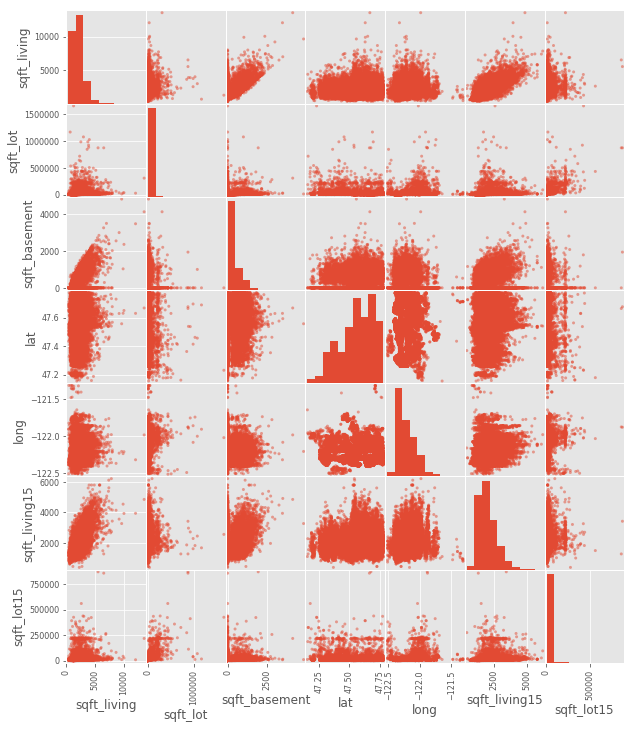

In [803]:
pd.plotting.scatter_matrix(kc[x_cols], figsize=(10,12));

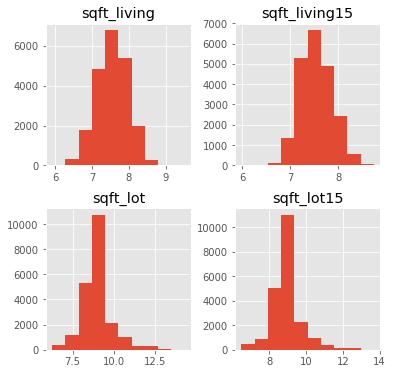

In [902]:
# Let's look at log transformation on continuous variables
#Continuous data: date, sqft_living, sqft_lot, sqft_above, lat, long, sqft_living15, sqft_lot15
# We removed sqft_above since it is highly correlated with two other variables
data_log= pd.DataFrame([])
data_log["sqft_living"] = np.log(kc["sqft_living"])
data_log["sqft_lot"] = np.log(kc["sqft_lot"])
data_log["sqft_living15"] = np.log(kc["sqft_living15"])
data_log["sqft_lot15"] = np.log(kc["sqft_lot15"])

data_log.hist(figsize  = [6, 6]);

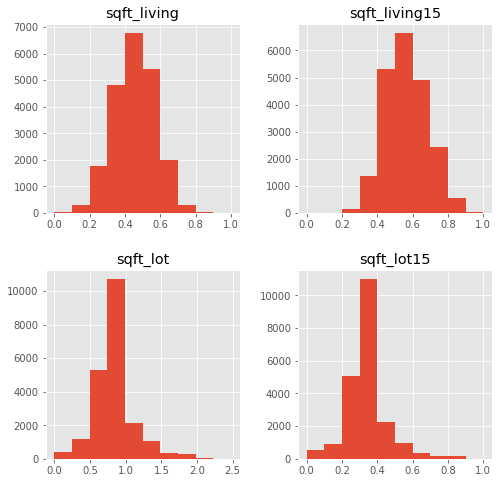

In [903]:
#log transform all continuous variables we are keeping
logsqft_living = data_log["sqft_living"]
logsqft_lot = data_log["sqft_lot"]
logsqft_living15 = data_log["sqft_living15"]
logsqft_lot15 = data_log["sqft_lot15"]

kc_features_final= pd.DataFrame([])

# Use min max scaling on all continuous variables
kc_features_final["sqft_living"] = (logsqft_living-min(logsqft_living))/(max(logsqft_living)-min(logsqft_living))
kc_features_final["sqft_lot"] = (logsqft_lot-min(logsqft_lot))/(max(logsqft_living)-min(logsqft_lot))
kc_features_final["sqft_living15"] = (logsqft_living15-min(logsqft_living15))/(max(logsqft_living15)-min(logsqft_living15))
kc_features_final["sqft_lot15"] = (logsqft_lot15-min(logsqft_lot15))/(max(logsqft_lot15)-min(logsqft_lot15))

kc_features_final.hist(figsize  = [8, 8]);


In [907]:
# now add dummies to new dataframe
#- Categorical data: bedrooms, bathrooms, floors, waterfront, view, condition, yr_built, yr_renovated, grade, zipcode
kc_features_final = pd.concat([kc_features_final, bed_dummy, bath_dummy, condition_dummy, grade_dummy,
                               view_dummy], axis=1)

## Multiple Linear Regression Time

In [908]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [909]:
kc.head()

,id,date,price,sqft_living,sqft_lot,waterfront,sqft_basement,lat,long,sqft_living15,...,"yr_built_(2010, 2020]","yr_renovated_(0, 1940]","yr_renovated_(1940, 1950]","yr_renovated_(1950, 1960]","yr_renovated_(1960, 1970]","yr_renovated_(1970, 1980]","yr_renovated_(1980, 1990]","yr_renovated_(1990, 2000]","yr_renovated_(2000, 2010]","yr_renovated_(2010, 2020]"
0,7129300520,10/13/2014,221900.0,1180,5650,0.0,0.0,47.5112,-122.257,1340,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,2570,7242,0.0,400.0,47.7210,-122.319,1690,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,770,10000,0.0,0.0,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,1960,5000,0.0,910.0,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,1680,8080,0.0,0.0,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0


In [910]:
kc = kc.drop("date",axis=1)


In [911]:
X = kc_features_final
y = pd.DataFrame(kc.price, columns= ["price"])

In [912]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

C:\Users\isali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     660.1
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:50:54   Log-Likelihood:            -2.9356e+05
No. Observations:               21420   AIC:                         5.872e+05
Df Residuals:                   21358   BIC:                         5.877e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.137e+05    2.7e+04     22.758      0.000    5.61e+05    6.67e+05
sqft_living     9.273e+05   2.95e+04     31.449      0.000     8.7e+05    9.85e+05
sqft_lot       -2.902e+04   1.38e+04     -2.096      0.036   -5.62e+04   -1886.307
sqft_living15   2.985e+05   2.09e+04     14.248      0.000    2.57e+05     3.4e+05
sqft_lot15     -2.855e+05   3.37e+04     -8.466      0.000   -3.52e+05   -2.19e+05
bedrooms_1      1.087e+05   3.23e+04      3.368      0.001    4.54e+04    1.72e+05
bedrooms_2      8.097e+04   2.86e+04      2.831      0.005    2.49e+04    1.37e+05
bedrooms_3      2.955e+04   2.83e+04      1.045      0.296   -2.59e+04     8.5e+04
bedrooms_4      1.554e+04   2.83e+04      0.549      0.583   -3.99e+04     7.1e+04
bedrooms_5      3.167e+04   2.86e+04      1.108      0.268   -2.44e+04    8.77e+04
bedrooms_6      4698.1556   3.07e+04      0.153      0.878   -5.54e+04    6.48e+04
bedrooms_7      -8.94e+04   4.34e+04     -2.060      0.039   -1.74e+05   -4333.839
bedrooms_8      1.849e+05   6.25e+04      2.961      0.003    6.25e+04    3.07e+05
bedrooms_9      1.176e+05   9.36e+04      1.256      0.209    -6.6e+04    3.01e+05
bedrooms_10    -6.079e+04    1.2e+05     -0.507      0.612   -2.96e+05    1.74e+05
bedrooms_11     1.177e+04   2.01e+05      0.058      0.953   -3.83e+05    4.06e+05
bedrooms_33     1.785e+05   2.01e+05      0.888      0.375   -2.16e+05    5.73e+05
bathrooms_0.5  -4.521e+05   1.07e+05     -4.239      0.000   -6.61e+05   -2.43e+05
bathrooms_0.75 -3.315e+05   3.34e+04     -9.921      0.000   -3.97e+05   -2.66e+05
bathrooms_1.0  -3.364e+05   1.99e+04    -16.891      0.000   -3.75e+05   -2.97e+05
bathrooms_1.25 -4.028e+05   7.25e+04     -5.557      0.000   -5.45e+05   -2.61e+05
bathrooms_1.5  -3.808e+05      2e+04    -19.009      0.000    -4.2e+05   -3.42e+05
bathrooms_1.75 -3.889e+05   1.95e+04    -19.897      0.000   -4.27e+05   -3.51e+05
bathrooms_2.0  -3.873e+05   1.97e+04    -19.649      0.000   -4.26e+05   -3.49e+05
bathrooms_2.25 -4.025e+05   1.96e+04    -20.538      0.000   -4.41e+05   -3.64e+05
bathrooms_2.5  -4.579e+05   1.92e+04    -23.870      0.000   -4.96e+05    -4.2e+05
bathrooms_2.75 -4.168e+05   1.98e+04    -21.032      0.000   -4.56e+05   -3.78e+05
bathrooms_3.0  -3.712e+05   2.02e+04    -18.372      0.000   -4.11e+05   -3.32e+05
bathrooms_3.25 -3.161e+05   2.05e+04    -15.418      0.000   -3.56e+05   -2.76e+05
bathrooms_3.5  -3.743e+05   2.01e+04    -18.583      0.000   -4.14e+05   -3.35e+05
bathrooms_3.75  -2.23e+05   2.49e+04     -8.969      0.000   -2.72e+05   -1.74e+05
bathrooms_4.0  -2.258e+05   2.55e+04     -8.849      0.000   -2.76e+05   -1.76e+05
bathrooms_4.25 -1.238e+05   2.97e+04     -4.163      0.000   -1.82e+05   -6.55e+04
bathrooms_4.5  -1.824e+05   2.78e+04     -6.563      0.000   -2.37e+05   -1.28e+05
bathrooms_4.

Observations:

- We can see that bathroom, view and grade are highly correlated with price

In [ ]:
for column in dataframe.columns:
IQR = dataframe.column.percentile(0.75) - dataframe.column.percentile(0.25) 
for element in column
if element > mean + IQR remove elemente
or if element < mean - IQR
